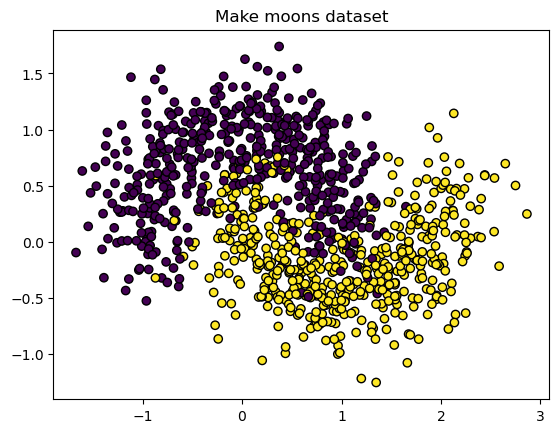

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Make moons dataset')
plt.show()


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()


voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.82
RandomForestClassifier 0.91
SVC 0.915
VotingClassifier 0.905


In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft'
)


voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Soft voting increases the probablities of class prediction overall not just majority of prediction but probability averaged

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.82
RandomForestClassifier 0.92
SVC 0.915
VotingClassifier 0.92


In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


# The BaggingClassifier automatically peforms soft voting except if we use base class as SVM without probability
# Bootstrap = True enables bagging else if we set to false it works as pasting which will increase variance

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9100
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.93      0.89      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Confusion Matrix:
[[93  7]
 [11 89]]


In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

# Calculate the out of bag error while training the model using OOB evaluation which is likely to be same as accuracy score

0.90125

In [9]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.905

In [10]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred_rf)

0.925

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


[[93  7]
 [ 8 92]]


In [14]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1, random_state = 42)
ext_clf.fit(X_train, y_train)

# Chooses splitting and trees at very random unlike random forest which chose best split using gini index or entropy but it will reduce variance

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,16
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [15]:
y_pred_ext = ext_clf.predict(X_test)

In [16]:
accuracy_ext = accuracy_score(y_test, y_pred_ext)
print(f'ExtraTreesClassifier Accuracy: {accuracy_ext:.4f}')
print("Classification Report for ExtraTreesClassifier:")
print(classification_report(y_test, y_pred_ext))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ext))


# we got lower accuracy than Random Forest

ExtraTreesClassifier Accuracy: 0.8850
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.90      0.87      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

Confusion Matrix:
[[90 10]
 [13 87]]


In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rnd_clf.fit(iris["data"], iris["target"])

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,score)

# we can use feature_importances_ variable to get the most important features in a datset in random forest classifier or decision tree as the 
# most important feature will always be split near root nose

sepal length (cm) 0.09948518001126785
sepal width (cm) 0.024808799727738695
petal length (cm) 0.4398016341449389
petal width (cm) 0.43590438611605464


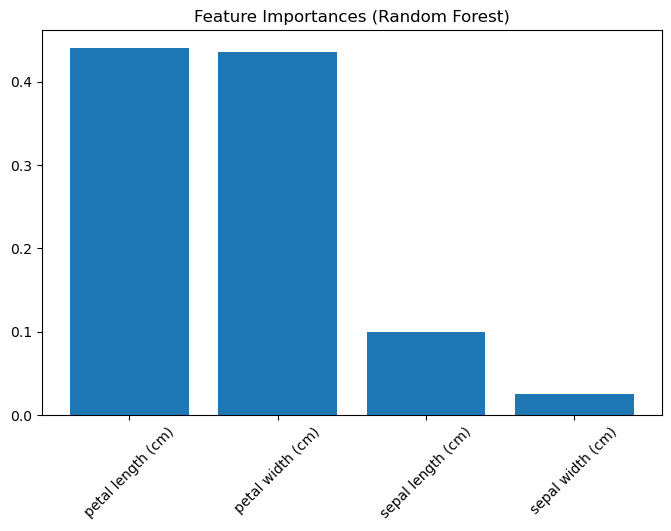

In [20]:
import matplotlib.pyplot as plt
import numpy as np

importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [iris["feature_names"][i] for i in indices]

plt.figure(figsize=(8,5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=45)
plt.show()

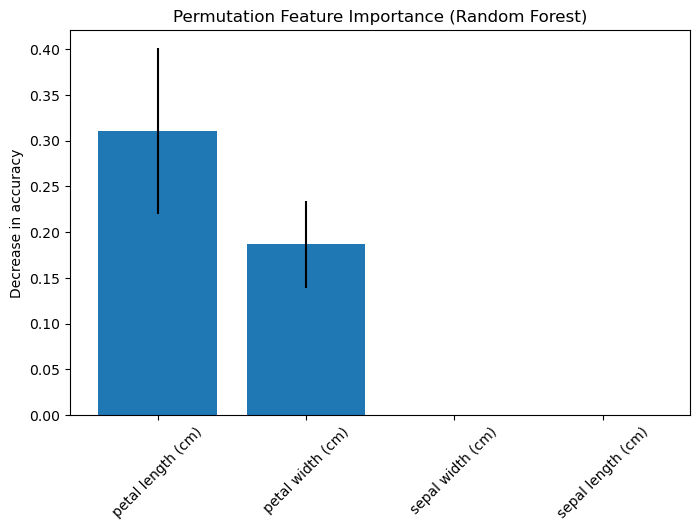

In [21]:
from sklearn.inspection import permutation_importance


X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train, y_train)

# Compute permutation importance on test set
result = permutation_importance(rnd_clf, X_test, y_test, n_repeats=10, random_state=42)

# Get mean importance and std deviation
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8,5))
plt.title("Permutation Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(importances)), np.array(iris.feature_names)[indices], rotation=45)
plt.ylabel("Decrease in accuracy")
plt.show()

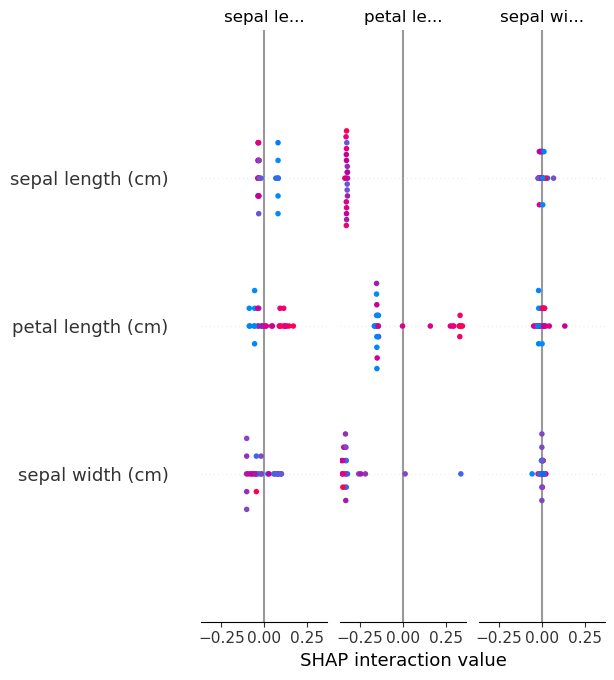

In [22]:
import shap

explainer = shap.TreeExplainer(rnd_clf)

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values for all classes
shap.summary_plot(shap_values, features=X_test, feature_names=iris.feature_names)


In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 50,
    algorithm = "SAMME", learning_rate = 0.5
                          
)

ada_clf.fit(X_train, y_train)

C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,0.5
,algorithm,'SAMME'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [24]:
from sklearn.metrics import classification_report

y_pred = ada_clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth = 4)
tree_reg1.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [27]:
y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [28]:

y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X, y)


,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)
         ]
best_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = best_n_estimators)
gbrt_best.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,np.int64(119)
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [31]:
y_val_pred = gbrt_best.predict(X_val)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0621


In [32]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error: {mae:.4f}")

from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_val_pred)
print(f"R^2 Score: {r2:.4f}")

Root Mean Squared Error: 0.2492
Mean Absolute Error: 0.1502
R^2 Score: 0.7516


In [33]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)

    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1

        if error_going_up == 5:
            break

In [34]:
y_val_pred = gbrt.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.0633
RMSE: 0.2515
MAE: 0.1534
R^2: 0.7469


In [35]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

X_train, y_train = X[:40000], y[:40000]
X_val, y_val = X[40000:50000], y[40000:50000]
X_test, y_test = X[50000:], y[50000:]

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)  
et_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
svm_clf = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

rf_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

rf_val_pred = rf_clf.predict(X_val)
et_val_pred = et_clf.predict(X_val)
svm_val_pred = svm_clf.predict(X_val)

rf_val_acc = accuracy_score(y_val, rf_val_pred)
et_val_acc = accuracy_score(y_val, et_val_pred)
svm_val_acc = accuracy_score(y_val, svm_val_pred)

print(f'Random Forest validation accuracy: {rf_val_acc:.4f}')
print(f'Extra Trees validation accuracy: {et_val_acc:.4f}')
print(f'SVM validation accuracy: {svm_val_acc:.4f}')


Random Forest validation accuracy: 0.9607
Extra Trees validation accuracy: 0.9634
SVM validation accuracy: 0.9535


In [36]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('et', et_clf), ('svm', svm_clf)],
    voting='soft',  # Use predicted probabilities to combine models
    n_jobs=-1
)

voting_clf.fit(X_train, y_train)

voting_val_pred = voting_clf.predict(X_val)
voting_val_acc = accuracy_score(y_val, voting_val_pred)
print(f'Voting classifier validation accuracy: {voting_val_acc:.4f}')

voting_test_pred = voting_clf.predict(X_test)
voting_test_acc = accuracy_score(y_test, voting_test_pred)
print(f'Voting classifier test accuracy: {voting_test_acc:.4f}')

# Summary:
print("\nPerformance improvement on validation and test sets:")
print(f"Validation accuracy improvement over best individual: {voting_val_acc - max(rf_val_acc, et_val_acc, svm_val_acc):.4f}")
print(f"Test accuracy of ensemble: {voting_test_acc:.4f}")


Voting classifier validation accuracy: 0.9668
Voting classifier test accuracy: 0.9744

Performance improvement on validation and test sets:
Validation accuracy improvement over best individual: 0.0034
Test accuracy of ensemble: 0.9744


In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_blender_train = np.column_stack((rf_val_pred, et_val_pred, svm_val_pred))
y_blender_train = y_val 

blender = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)

blender.fit(X_blender_train, y_blender_train)

rf_test_pred = rf_clf.predict(X_test)
et_test_pred = et_clf.predict(X_test)
svm_test_pred = svm_clf.predict(X_test)

#  Create test set features for the blender by stacking those predictions
X_blender_test = np.column_stack((rf_test_pred, et_test_pred, svm_test_pred))

blender_test_pred = blender.predict(X_blender_test)

# Evaluate the stacking ensemble (blender) performance on test set
blender_test_acc = accuracy_score(y_test, blender_test_pred)
print(f'Stacking ensemble test accuracy: {blender_test_acc:.4f}')

print(f'Voting classifier test accuracy: {voting_test_acc:.4f}')

improvement = blender_test_acc - voting_test_acc
print(f'Improvement of stacking ensemble over voting: {improvement:.4f}')


C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Stacking ensemble test accuracy: 0.9557
Voting classifier test accuracy: 0.9744
Improvement of stacking ensemble over voting: -0.0186
